In [1]:
import numpy as np
import imagecodecs as ic
import matplotlib.pyplot as plt
from math import pi, cos, sin
from collections import defaultdict
from skimage import feature, morphology,transform

In [2]:
X_start = 8000
X_end = 9500
Y_start= 15500
Y_end = 17000

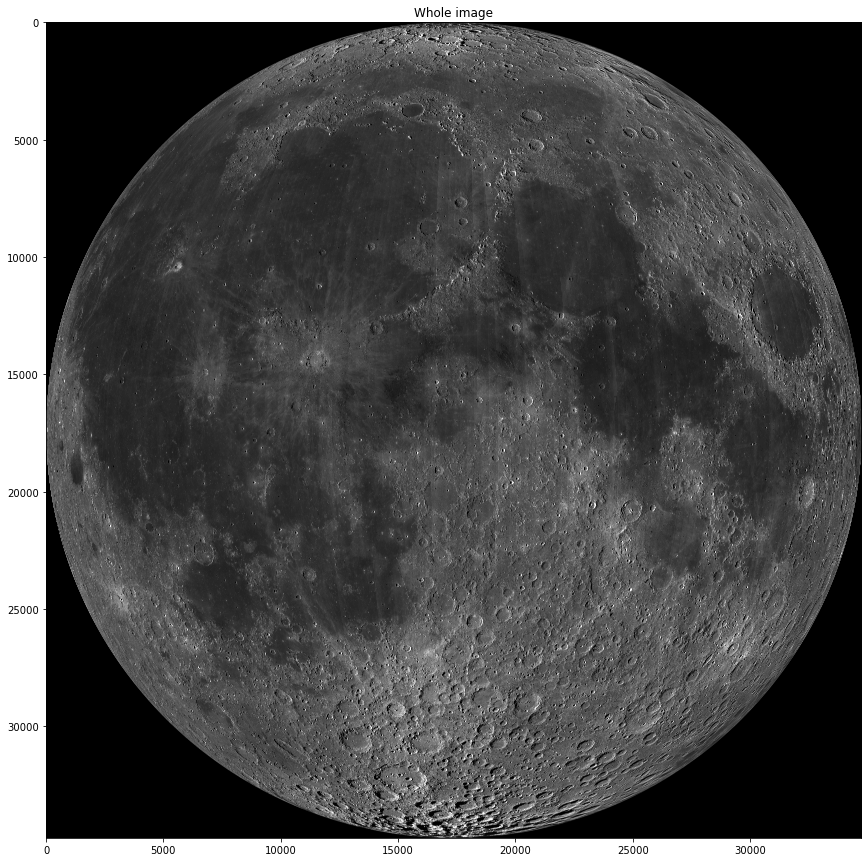

In [3]:
moon = ic.imread('./WAC_GL000.tif')
plt.figure(figsize= (15, 15))
plt.title('Whole image')
plt.imshow(moon,cmap='gray')

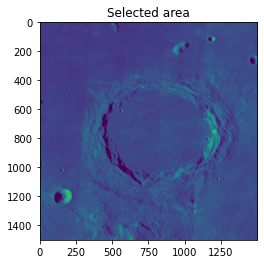

In [4]:

crop = moon[X_start:X_end, Y_start:Y_end]
plt.title('Selected area')
plt.imshow(crop)

In [5]:
def Crater(moon, canny_edge, r, iteractions, threshold, title):
    circle_detection = []
    for t in range(iteractions):
        circle_detection.append((r, int(r*np.cos(2*pi*t/iteractions)), int(r*np.sin(2*pi*t/iteractions))))
    DaO = defaultdict(int)
    for x in range(canny_edge.shape[0]):
        for y in range(canny_edge.shape[1]):
            if canny_edge[x][y]:
                for r, dx, dy in circle_detection:
                    DaO[(x - dx, y - dy, r)] += 1
    circles = []
    for k, v in sorted(DaO.items(), key=lambda i: -i[1]):
        x, y, r = k
        if v / iteractions >= threshold and all((x - xc)**2 + (y - yc)**2 > rc**2 for xc, yc, rc in circles):
            circles.append((x, y, r))

    Number_of_craters, gR, gX, gY, gCircle = 0, 0, 0, 0, (0,0,0)
    fig, ax = plt.subplots(figsize= (10, 10))
    ax.imshow(moon)
    for circle in circles:
        ax.add_artist(plt.Circle((circle[1]*5, circle[0]*5), circle[2]*5, fill= False, color= 'r',linewidth=3))
        Gr, Gx, Gy ,G_Circle = circle[2]*5, circle[0]*5, circle[1]*5, (circle[0]*5, circle[1]*5, circle[2]*5)
        Number_of_craters += 1
        if Number_of_craters == 1:
            break

    plt.title(title)
    plt.show()
    return Gx, Gy, Gr, G_Circle

In [6]:
def Craters(Crater, mask, minR, maxR, iteractions, threshold, title):
    circle_detection = []
    for r in range(minR, maxR + 1):
        for t in range(iteractions):
            circle_detection.append((r, int(r*cos(2*pi*t/iteractions)), int(r*sin(2*pi*t/iteractions))))



    DaO = defaultdict(int)
    for x in range(mask.shape[0]):
        for y in range(mask.shape[1]):
            if mask[x][y]:
                for r, dx, dy in circle_detection:
                    DaO[(x - dx, y - dy, r)] += 1


    circles = []
    for k, v in sorted(DaO.items(), key= lambda i: -i[1]):
        x, y, r = k
        if v / iteractions >= threshold and all((x - xc)**2 + (y - yc)**2 > rc**2 for xc, yc, rc in circles):
            circles.append((x, y, r))

    fig, ax = plt.subplots(figsize= (10, 10))
    ax.imshow(Crater)
    Number_of_craters = 0
    xyz = []
    frame = int(mask.shape[0]/4)
    for circle in circles:
        if frame < circle[0] < mask.shape[0] - frame and frame < circle[1] < mask.shape[0] - frame:
            ax.add_artist(plt.Circle((circle[1],circle[0]), circle[2],fill= False, color= 'b'))
            xyz.append((circle[0], circle[1], circle[2]))
            Number_of_craters += 1
        if Number_of_craters == 5:
            break
    plt.title(title)
    plt.show()
    return Number_of_craters, xyz

In [7]:
def Print(X, Y, XYR):

    print("X: ", X + XYR[1])
    print("Y: ", Y + XYR[0])
    print("Radius: ", XYR[2])
    for i in range(5):
        print('Small crater - X:', X + (XYR[0] - XYR[2]) + xyz[i][1],
              'Y:', Y + (XYR[1] - XYR[2]) + xyz[i][0],
              'Radius: ', xyz[i][2])

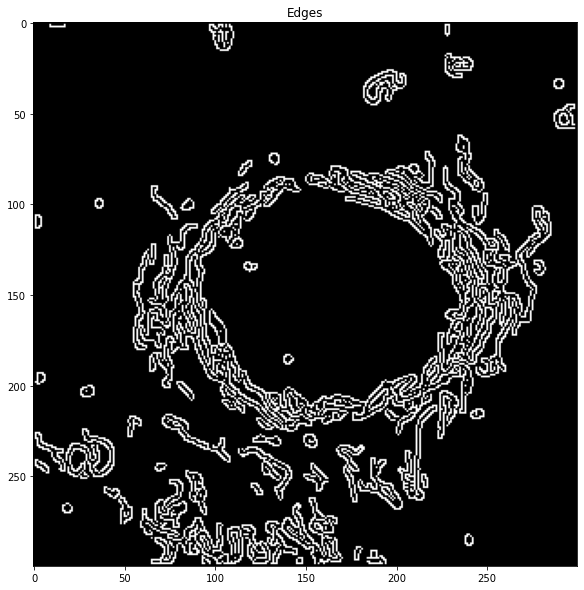

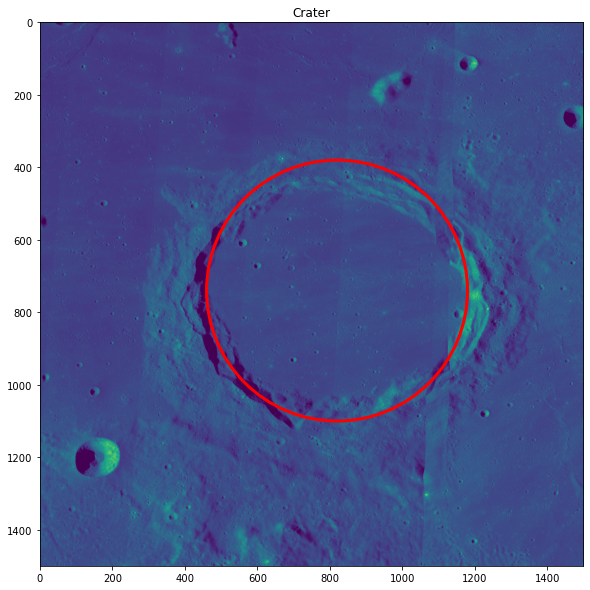

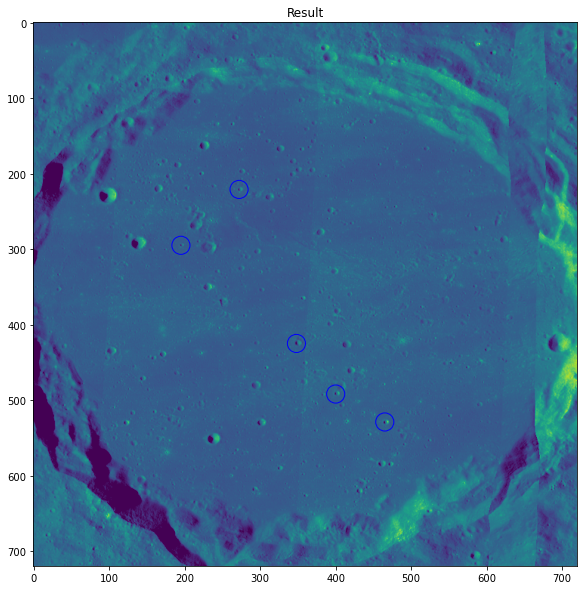

X:  8820
Y:  16240
Radius:  360
Small crater - X: 8652 Y: 16181 Radius:  12
Small crater - X: 8845 Y: 16489 Radius:  12
Small crater - X: 8575 Y: 16255 Radius:  12
Small crater - X: 8780 Y: 16452 Radius:  12
Small crater - X: 8728 Y: 16385 Radius:  12


In [9]:
Number_of_Craters, XYR, xyz,= 0, (0,0,0), []
for For_X  in range(X_start,X_end,X_end-X_start):
    for For_Y in range(Y_start,Y_end,Y_end-Y_start):
            crop = moon[For_X:For_X+X_end-X_start, For_Y:For_Y+Y_end-Y_start]
            canny_edge  = feature.canny(feature.canny(transform.resize(crop, (300,300))))

            plt.figure(figsize= (10,10))
            plt.title('Edges')
            plt.imshow(canny_edge,cmap='gray')

            X, Y, R, XYR = Crater(crop, canny_edge, 72, 111, 0.35, 'Crater')

            zoom_crater = crop[(R - X) * -1:R + X, (R - Y) * -1:R + Y]

            mask = np.zeros((zoom_crater.shape[0], zoom_crater.shape[1]))
            for y in range(zoom_crater.shape[1]):
                for x in range(zoom_crater.shape[0]):
                    if int(zoom_crater[y][x]) <= 1:
                        mask[y][x] = 1
            mask = feature.canny(morphology.opening(morphology.dilation(mask, morphology.disk(11)), morphology.disk(1)), sigma= 1)

            Number_of_Craters, xyz = Craters(zoom_crater, mask, 10, 20, 99, 0.35, 'Result')

            if Number_of_Craters == 5:
                break


Print(For_X, For_Y, XYR)